In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


customers=pd.read_csv("../Data/customers.csv")
geo=pd.read_csv("../Data/geolocation.csv")
items=pd.read_csv("../Data/orderItems.csv")
payments=pd.read_csv("../Data/payment.csv")
reviews=pd.read_csv("../Data/orderReviews.csv")
orders=pd.read_csv("../Data/orders.csv")
products=pd.read_csv("../Data/products.csv")
sellers=pd.read_csv("../Data/sellers.csv")


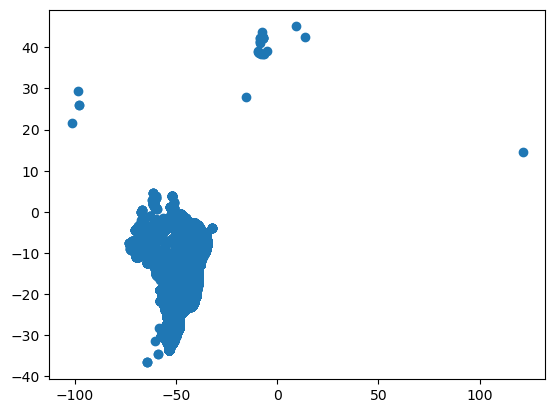

In [2]:
plt.scatter(x=geo["geolocation_lng"],y=geo["geolocation_lat"])



# identify optimal number of clusters Using Elbow method

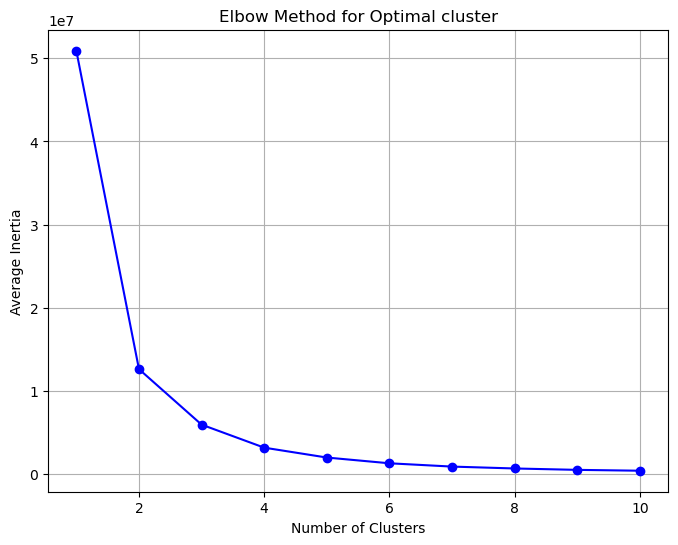

In [3]:

from sklearn.cluster import KMeans

# kmeans= KMeans(n_clusters=4).fit(geo[['geolocation_lng','geolocation_lat']])
# kmeans.labels_

inertia = []

# Define a range of cluster numbers to try
cluster_range = range(1, 11)

# Iterate through the cluster range and compute inertia for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k,n_init=10)#Number of time the k-means algorithm will be run with different centroid seeds
    kmeans.fit(geo[['geolocation_lng','geolocation_lat']])
    inertia.append(kmeans.inertia_/k)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Inertia')
plt.title('Elbow Method for Optimal cluster')
plt.grid()
plt.show()

Inertia quantifies how internally coherent the clusters are. In other words, it <b>measures how close the data points are to their respective cluster centers</b>.
A good model is one with low inertia AND a low number of clusters.
The formula for calculating inertia is $\large\sum_{i=1}^n (Xi-Ck)^2$</br>
-n is the total number of data points</br>
-Ck is the centroid of the cluster X is assigned to


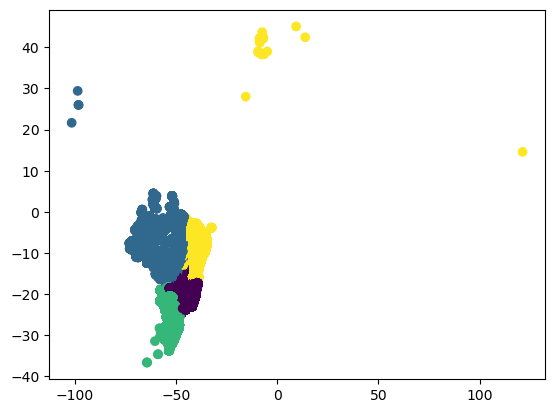

In [4]:
for i in range (4,5):
    kmeans = KMeans(n_clusters=i,n_init=10)# n_init Number of time the k-means algorithm will be run with different centroid seeds
    kmeans.fit(geo[['geolocation_lng','geolocation_lat']])
    plt.scatter(x=geo['geolocation_lng'],y=geo['geolocation_lat'],c=kmeans.labels_)
    plt.show()


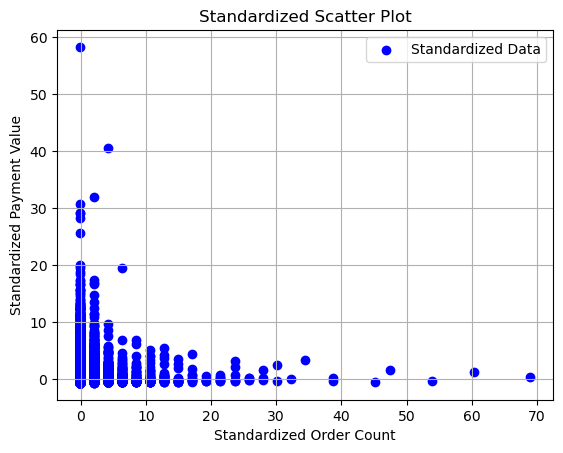

In [5]:
from sklearn.preprocessing import StandardScaler
combined_data = pd.merge(payments, orders, on='order_id', how='inner')
combined_data = pd.merge(combined_data, customers, on='customer_id', how='inner')


customer_data = combined_data[['customer_id', 'customer_unique_id', 'order_id', 'payment_value']]
agg_customer_data = customer_data.groupby('customer_unique_id').agg({'order_id': 'count', 'payment_value': 'sum'})
agg_customer_data.head(10)

scaler = StandardScaler() #standardizing data,x- meanx/standard deviation
scaled_data = scaler.fit_transform(agg_customer_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c='blue', marker='o', label='Standardized Data')
plt.title('Standardized Scatter Plot')
plt.xlabel('Standardized Order Count')
plt.ylabel('Standardized Payment Value')
plt.legend()
plt.grid()
plt.show()




In [6]:
from sklearn.preprocessing import StandardScaler
combined_data = pd.merge(payments, orders, on='order_id', how='inner')
combined_data = pd.merge(combined_data, customers, on='customer_id', how='inner')


customer_data = combined_data[['customer_id', 'customer_unique_id', 'order_id', 'payment_value']]
agg_customer_data = customer_data.groupby('customer_unique_id').agg({'order_id': 'count', 'payment_value': 'sum'})


 #standardizing data,x- meanx/standard deviation


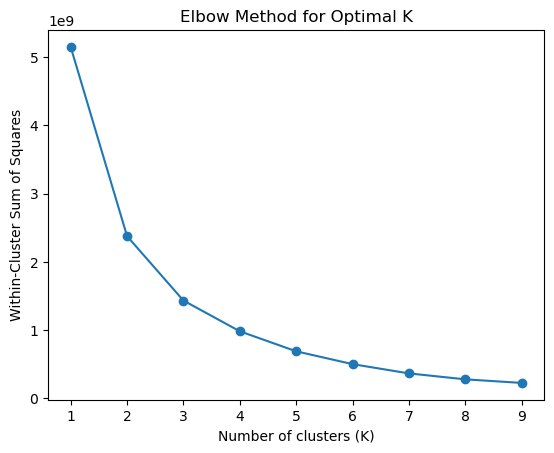

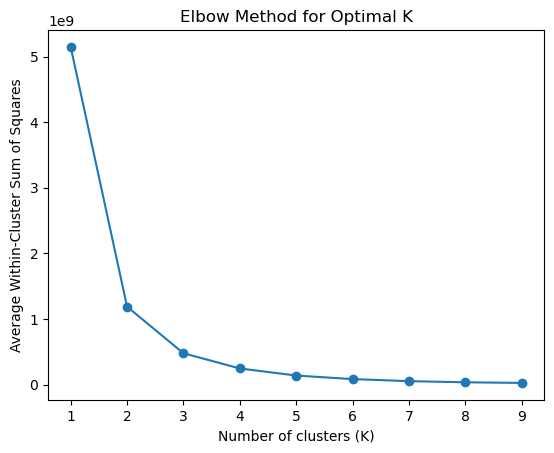

In [21]:
from sklearn.preprocessing import StandardScaler
combined_data = pd.merge(payments, orders, on='order_id', how='inner')
combined_data = pd.merge(combined_data, customers, on='customer_id', how='inner')


customer_data = combined_data[['customer_id', 'customer_unique_id', 'order_id', 'payment_value']]
agg_customer_data = customer_data.groupby('customer_unique_id').agg({'order_id': 'count', 'payment_value': 'sum'})

wcss = []
awcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10)#if you want data to be reproducible we can use the random_state=number
    kmeans.fit(agg_customer_data)
    wcss.append(kmeans.inertia_)
    awcss.append(wcss[i-1]/i)

plt.plot(range(1, 10), wcss,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()
plt.plot(range(1, 10), awcss,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.show()

In [15]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10)
agg_customer_data['cluster'] = kmeans.fit_predict(scaled_data)



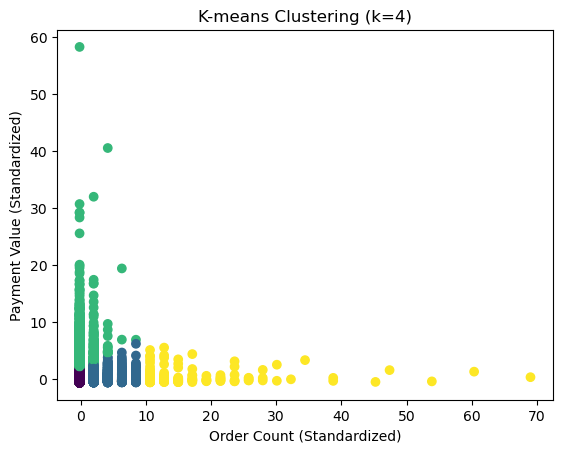

In [16]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
labels = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering (k=4)')
plt.xlabel('Order Count (Standardized)')
plt.ylabel('Payment Value (Standardized)')
plt.show()

### 

In [11]:

deliveryDf = orders[["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]].copy()

#changing row to datetime
deliveryDf["order_purchase_timestamp"] = pd.to_datetime(deliveryDf["order_purchase_timestamp"])
deliveryDf["order_delivered_customer_date"] = pd.to_datetime(deliveryDf["order_delivered_customer_date"])
deliveryDf["order_estimated_delivery_date"] = pd.to_datetime(deliveryDf["order_estimated_delivery_date"])
#calculating actual delivery time and delivery prediction
deliveryDf["actual_delivery_time"] = (deliveryDf["order_delivered_customer_date"] - deliveryDf["order_purchase_timestamp"]).dt.days
deliveryDf["delivery_predict"] = (deliveryDf["order_delivered_customer_date"] - deliveryDf["order_estimated_delivery_date"]).dt.days
#dropping null values
deliveryDf = deliveryDf.dropna(subset=["actual_delivery_time", "delivery_predict"])
deliveryDf.describe()


,actual_delivery_time,delivery_predict
count,96476.000000,96476.000000
mean,12.094086,-11.876881
std,9.551746,10.183854
min,0.000000,-147.000000
25%,6.000000,-17.000000
50%,10.000000,-12.000000
75%,15.000000,-7.000000
max,209.000000,188.000000


In [12]:
from sklearn.metrics import silhouette_score
cluster_range = range(2, 10)  
wcss = []
silhouette_scores = []
for nbCluster in cluster_range:
    kmeans = KMeans(n_clusters=nbCluster, random_state=0,n_init=10)
    deliveryDf["cluster"] = kmeans.fit_predict(deliveryDf[["actual_delivery_time", "delivery_predict"]])
    silhouette_avg = silhouette_score(deliveryDf[["actual_delivery_time", "delivery_predict"]], deliveryDf["cluster"])
    silhouette_scores.append(silhouette_avg)
    wcss.append(kmeans.inertia_)

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(deliveryDf[['delivery_predict','actual_delivery_time']], deliveryDf["cluster"])


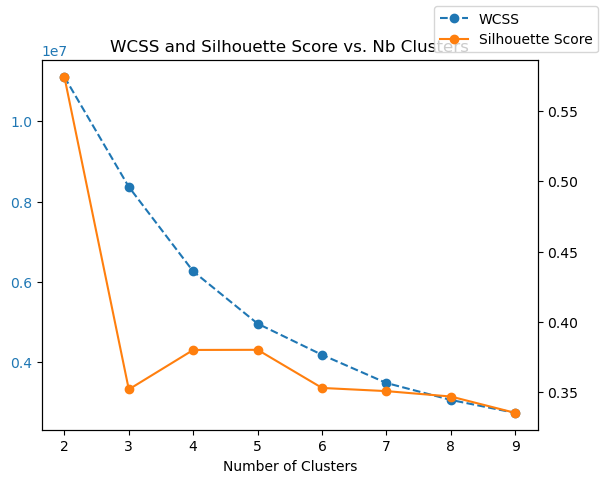

In [13]:
labels = kmeans.labels_

# Create a dual-axis plot
fig, ax1 = plt.subplots()

ax1.plot(range(2, nbCluster + 1), wcss, marker='o', linestyle='--', label='WCSS')
ax1.set_xlabel('Number of Clusters')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create a second y-axis on the same subplot
ax2 = ax1.twinx()

# Plot Silhouette Score on the second y-axis
ax2.plot(range(2, nbCluster + 1), silhouette_scores, marker='o', label='Silhouette Score', color='tab:orange')
lines1, labels1 = ax1.get_legend_handles_labels()
# Display legends
fig.legend(loc="upper right")

plt.title('WCSS and Silhouette Score vs. Nb Clusters')
plt.show()

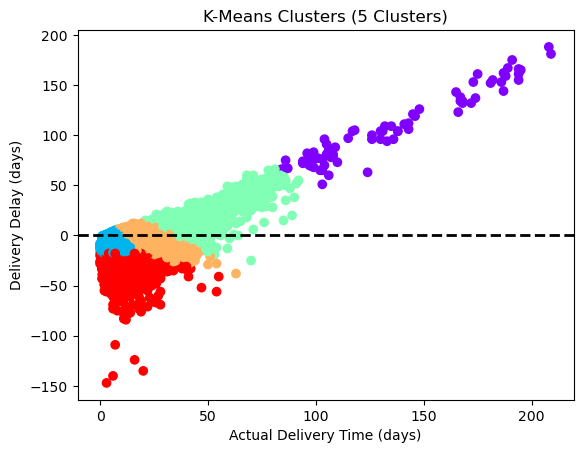

In [14]:

nbClusters = 5
kmeans = KMeans(n_clusters=nbClusters,n_init=10)

# Fit the KMeans model
kmeans.fit(deliveryDf[["actual_delivery_time", "delivery_predict"]])

# Get cluster labels
labels = kmeans.labels_
deliveryDf['cluster']=labels
# Visualize the clusters
plt.scatter(deliveryDf["actual_delivery_time"], deliveryDf["delivery_predict"], c=deliveryDf['cluster'], cmap='rainbow')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Delivery Time (days)")
plt.ylabel("Delivery Delay (days)")
plt.title("K-Means Clusters (5 Clusters)")
plt.show()

$ \large T_{Delay}= T_{Delivered} - T_{Estimated}$</br>
$ \large T_{Actual}= T_{Delivered} - T_{Purchase}$